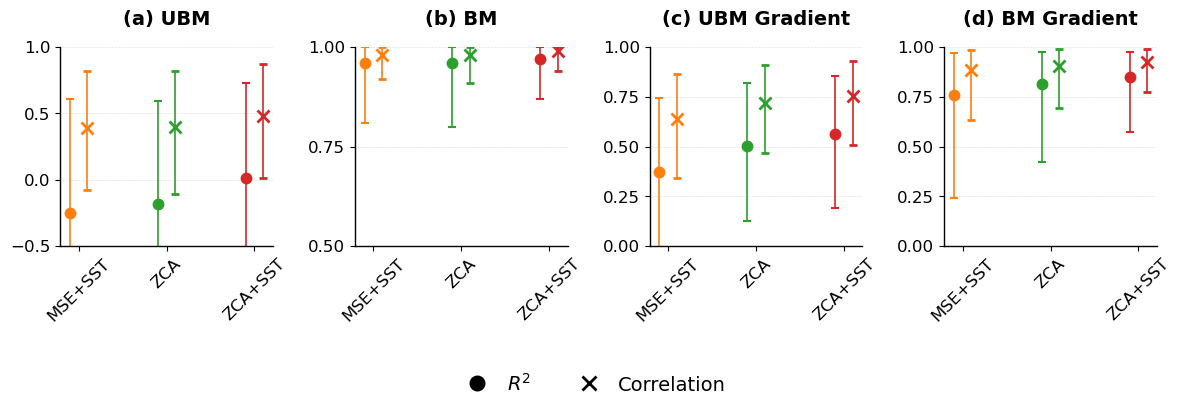

In [2]:
import numpy as np
import matplotlib.pyplot as plt

models    = ["MSE+SST", "ZCA", "ZCA+SST"]
variables = ["(a) UBM", "(b) BM", "(c) UBM Gradient", "(d) BM Gradient"]

r2_mean = np.array([
    [-0.25, 0.96, (0.386+0.356)/2, (0.761+0.754)/2],   # MSE+SST 
    [-0.18, 0.96, (0.508+0.501)/2, (0.812+0.813)/2],   # ZCA 
    [ 0.01, 0.97, (0.577+0.550)/2, (0.848+0.849)/2],   # ZCA+SST 
])
r2_p5 = np.array([
    [-1.58, 0.81, (-0.067-0.114)/2, (0.277+0.206)/2],
    [-1.35, 0.80, (0.115+0.141)/2, (0.445+0.399)/2],
    [-0.94, 0.87, (0.212+0.174)/2, (0.567+0.582)/2],
])
r2_p95 = np.array([
    [0.61, 1.00, (0.733+0.751)/2, (0.967+0.968)/2],
    [0.59, 1.00, (0.813+0.825)/2, (0.973+0.976)/2],
    [0.73, 1.00, (0.846+0.866)/2, (0.975+0.977)/2],
])


corr_mean = np.array([
    [0.39, 0.98, (0.647+0.631)/2, (0.885+0.883)/2],   # MSE+SST
    [0.40, 0.98, (0.723+0.718)/2, (0.904+0.904)/2],   # ZCA 
    [0.48, 0.99, (0.761+0.750)/2, (0.925+0.924)/2],   # ZCA+SST 
])
corr_p5 = np.array([
    [-0.08, 0.92, (0.357+0.332)/2, (0.648+0.623)/2],
    [-0.11, 0.91, (0.460+0.472)/2, (0.701+0.682)/2],
    [0.01, 0.94, (0.518+0.494)/2, (0.778+0.774)/2],
])
corr_p95 = np.array([
    [0.82, 1.00, (0.858+0.870)/2, (0.984+0.984)/2],
    [0.82, 1.00, (0.903+0.911)/2, (0.987+0.988)/2],
    [0.87, 1.00, (0.922+0.932)/2, (0.988+0.989)/2],
])



color_map = {
    "MSE+SST": "#ff7f0e",  
    "ZCA":     "#2ca02c",   
    "ZCA+SST": "#d62728",  
}
cap_size = 3
marker_size = 7
line_width = 1.2
mark_edge_width = 1.5

title_fontsize = 14      
tick_labelsize = 12        
xaxis_labelsize = 12       

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['DejaVu Sans', 'Helvetica', 'Arial', 'sans-serif'],
    'font.size': 12,  
    'axes.linewidth': 1.0,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.minor.width': 0.6,
    'ytick.minor.width': 0.6,
    'lines.linewidth': line_width,
    'patch.linewidth': 0.8,
    'axes.spines.top': False,
    'axes.spines.right': False,
})

def combined_points(ax, r2_means, r2_p5, r2_p95, corr_means, corr_p5, corr_p95, var_name, is_first=False):
    x = np.arange(len(models))
    
    # Plot R^2 values with dots
    for i, m in enumerate(models):
        r2_mean = r2_means[i]
        r2_low  = r2_p5[i]
        r2_high = r2_p95[i]
        
        ax.errorbar(
            i - 0.1, r2_mean,
            yerr=[[r2_mean - r2_low], [r2_high - r2_mean]],
            fmt='o', color=color_map[m], 
            markersize=marker_size, capsize=cap_size, 
            linewidth=line_width, markeredgewidth=mark_edge_width,
            capthick=line_width, alpha=1.0,
            label=f"{m} ($R^2$)" if is_first else None
        )
    
    # Plot correlation values with crosses
    for i, m in enumerate(models):
        corr_mean = corr_means[i]
        corr_low  = corr_p5[i]
        corr_high = corr_p95[i]
        
        ax.errorbar(
            i + 0.1, corr_mean,
            yerr=[[corr_mean - corr_low], [corr_high - corr_mean]],
            fmt='x', color=color_map[m], 
            markersize=marker_size + 2, capsize=cap_size, 
            linewidth=line_width, markeredgewidth=mark_edge_width + 0.5,
            capthick=line_width, alpha=1.0,
            label=f"{m} (Corr)" if is_first else None
        )
    
    ax.set_title(var_name, fontsize=title_fontsize, pad=16, fontweight='bold') 
    ax.set_ylim(0.5, 1.)
    ax.set_yticks([0.5, 0.75, 1.0])
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, fontsize=xaxis_labelsize)
    ax.tick_params(axis='y', which='major', labelsize=tick_labelsize)
    ax.grid(axis="y", linestyle=":", linewidth=0.4, alpha=0.5, color='gray')


# Create 1x4 subplot
fig, axes = plt.subplots(1, 4, figsize=(12, 3.5))  
plt.subplots_adjust(left=0.1, right=0.92, top=0.85, bottom=0.25, wspace=0.4)

for j, var in enumerate(variables):
    combined_points(
        axes[j],
        r2_mean[:, j], r2_p5[:, j], r2_p95[:, j],
        corr_mean[:, j], corr_p5[:, j], corr_p95[:, j],
        var_name=var,
        is_first=(j == 0)
    )
    if j==0: 
        axes[j].set_ylim(-0.5, 1.)
        axes[j].set_yticks([-0.5, 0.0, 0.5, 1.0])
    elif j in [2, 3]:  # Panels 3 and 4 (UBM Velocity and BM Velocity)
        axes[j].set_ylim(0, 1.)
        axes[j].set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])

# Create legend 
legend_elements = [
    plt.Line2D([0],[0], marker='o', color='w',
               markerfacecolor='black', markersize=10, 
               markeredgecolor='black', markeredgewidth=mark_edge_width,
               label="$R^2$"),
    plt.Line2D([0],[0], marker='x', color='black',
               markersize=10, markeredgewidth=mark_edge_width+0.5,
               label="Correlation", linestyle='None')
]
legend = fig.legend(
    legend_elements, [elem.get_label() for elem in legend_elements],
    loc="lower center", bbox_to_anchor=(0.5, -0.2),
    frameon=False, fontsize=14, handletextpad=0.5, ncol=2
)

plt.tight_layout()
plt.savefig("figures/publication_figure2.png", dpi=600, bbox_inches="tight", 
           facecolor='white', edgecolor='none')